In [13]:
# Automatic Speech Recognition WS-17-18
# Exercise 5, Task 5.1

# Group number: 6
# Members: Anna Piunova


# =========================================================
# Please make use of the functions and the variables
# provided in this block when you write your answer codes.

# Reminder:
# for i in range(0,3):
#     ...
# In this loop, i goes from 0 to 2.

import matplotlib.pyplot as plt
import numpy as np
import math
import sys

# Utilities
def Read(filename):
    data = []
    # Read function:
    #   Reads the data from the file path
    #   Returns the data as a list
    with open(filename) as f:
        data_str = f.readlines()
        for i in range(0, len(data_str)):
            data.append(float(data_str[i].rstrip()))
        return data
    
def Init():
    # Initialize the computation counter by 0.
    global counter
    counter = 0
    # Initialize the array of size KxT by 0.
    global D
    D = np.zeros([K+1,T])
    for t in range(1, T):
        D[0][t] = float("inf")
    # The backpointer array
    global B
    B = -np.ones([K,T], dtype=np.int)
    # The boundaries
    global tk
    tk = np.zeros(K+1, dtype=np.int)
    print("Initialization done.")

Let's see what the data points look like.


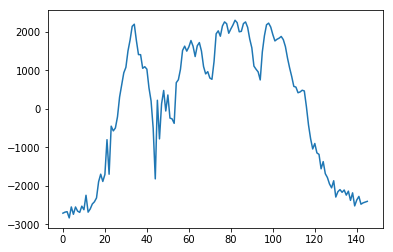

The objective of this task is to segment this data into 3 parts.
Initialization done.


In [29]:
# This is another helper code cell which introduces
# the name of variables to be used in your solution
# as well as the data you will use.
# The tasks start at the next block.

# Download the data from L2P and put the path here:
test_data = "/home/anya/Documents/asr/assignment_5/data_ex05.ascii"
test = Read(test_data)

# Visualize the data
print("Let's see what the data points look like.")
plt.plot(test)
plt.show()
print("The objective of this task is to segment this"
      " data into 3 parts.")

# Define some global variables
# Lengh of the data:
T = len(test)
# Number of segments:
K = 3

# Define container
D = np.zeros([K+1,T])

# Backpointer array:
B = -np.ones([K,T])

# Boundary indices:
tk = np.zeros(K+1, dtype=np.int)

# Counter for computation
counter = 0
# Initialize the table
Init()


In [49]:
#   Task 5.1 (b)
Init()

# You should introduce the two following 
# fuctions and use them in your code
def computeMean(begin, end):
    # Returns the mean value of the data
    # in the segment [begin, end] (closed)
    data_range = test[begin : (end + 1)]
    return (np.sum(data_range) / (end - begin + 1))

def computeError(begin, end, mean):
    # Returns the squared error between the data
    # and the mean in the segment [begin, end] (closed)
    data_range = test[begin : (end + 1)]
    mean_vec = [mean] * len(data_range)
    err = np.subtract(data_range, mean_vec)
    return np.dot(err, err)

for k in range(0, K + 1):
    for t in range(0, T):
        D[k][t] = sys.float_info.max

# TODO Write your dynamic programming code here:
# for k in range(1, K+1): ...
D[0][0] = 0
for k in range(1, K + 1):
    for t in range(1, T):
        for t_prime in range(0, t):
            local_mean = computeMean(t_prime + 1, t)
            segment_cost = computeError(t_prime + 1, t, local_mean)
            if D[k][t] >= D[k-1][t_prime] + segment_cost:
                B[k-1][t] = t_prime
                D[k][t] = D[k-1][t_prime] + segment_cost
        

# Let's print the global distance:
print("Optimal value is", D[K][T-1])
print("[Solution] which should be around 8.6*1e7")

# Traceback
tk = np.zeros(K+1, dtype=np.int)
tk[3] = T-1
# TODO You code here to get the boundaries
# and store them in the array tk
tk[2] = B[2][T - 1]
tk[1] = B[1][B[2][T - 1]]

# Let's print the boundaries and means:
print("\nThe boundaries we found are:")
for k in range(0,K+1):
    print("t", k," = ", tk[k], sep="")
print("\nThe mean values are:")
prev = 0
for k in range(1,K+1):
    print("from",prev,"to", tk[k], ":", computeMean(prev, tk[k]))
    prev = tk[k] + 1

print("\n-------------------------------------")
print("[Solutions] Theses values should match:")
print("t0 = 0")
print("t1 = 22")
print("t2 = 116")
print("t3 = 145")
print("which gives the means:")
print("from 0 to 22 : -2335.09")
print("from 23 to 116 : 1150.93")
print("from 117 to 145 : -1878.62")


Initialization done.
Optimal value is 85904479.1245
[Solution] which should be around 8.6*1e7

The boundaries we found are:
t0 = 0
t1 = 22
t2 = 116
t3 = 145

The mean values are:
from 0 to 22 : -2335.08695652
from 23 to 116 : 1150.92553191
from 117 to 145 : -1878.62068966

-------------------------------------
[Solutions] Theses values should match:
t0 = 0
t1 = 22
t2 = 116
t3 = 145
which gives the means:
from 0 to 22 : -2335.09
from 23 to 116 : 1150.93
from 117 to 145 : -1878.62


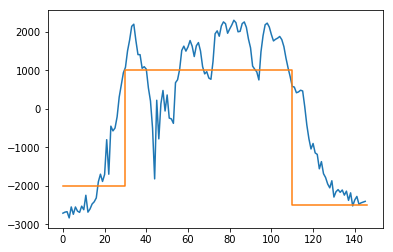

In [50]:
# Visualization of the boundaries you obtained
# Nothing is to be implemented in this cell.
t0 = 0
t3 = T

# TODO: Put the boundaries you found:
t1 = 30
t2 = 110

# TODO: Put the mean values you found:
mean01 = -2000
mean12 = 1000
mean23 = -2500

x = [t0,t1,t2,t3] 
y = [mean01, mean01, mean12, mean23] 

plt.plot(test)
plt.step(x, y)
plt.show()

In [65]:
#   Task 5.1 (d)
Init()
# hint: You can introduce two lists:
S = np.zeros(T+1)  # stores the cumulative sum of the data
Q = np.zeros(T+1)  # stores the cumulative sum of the square

for t in range(0, T):
    # TODO Change the line below
    # S stores the cumulative sum
    # of the data point:
    S[t] = S[t-1] + test[t]
    S[t+1] = 0
    # TODO Change the line below.
    # Q stores the cumulative sum
    # of the square of the data point:
    Q[t] = Q[t-1] + (test[t] ** 2)
    Q[t+1] = 0

def computeErrorFast(begin, end):
    # Returns the squared error between the data
    # and the mean in the segment [begin, end] (closed)
    # without redundancy.
    # TODO Implement this funtion
    err = Q[end] - Q[begin] - ((S[end] - S[begin]) ** 2) / (end - begin)
    return err

# TODO Your dynamic programming code here:
for k in range(0, K + 1):
    for t in range(0, T):
        D[k][t] = sys.float_info.max
D[0][0] = 0
for k in range(1, K + 1):
    for t in range(1, T):
        for t_prime in range(0, t):
            segment_cost = computeErrorFast(t_prime, t)
            if D[k][t] >= D[k-1][t_prime] + segment_cost:
                B[k-1][t] = t_prime
                D[k][t] = D[k-1][t_prime] + segment_cost
# Traceback
tk[3] = T-1
# TODO You code here to get the boundaries
# and store them in the array tk
tk[2] = B[2][T - 1]
tk[1] = B[1][B[2][T - 1]]

print("\nThe boundaries we found are:")
for k in range(0,K+1):
    print("t", k," = ", tk[k], sep="")

Initialization done.

The boundaries we found are:
t0 = 0
t1 = 22
t2 = 116
t3 = 145


In [ ]:
# End of the exercise 5.1